In [49]:
#Import required libraries

from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Read dataset

df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,CalorieIntake,Exercise,SleepDuration
0,0,M,148,72,35,0,33.6,0.627,50,1,2508.3,No,6
1,1,F,85,66,29,0,26.6,0.351,31,0,2760.0,Evening,8
2,0,M,183,64,0,0,23.3,0.672,32,1,6480.0,Morning,8
3,1,F,89,66,23,94,28.1,0.167,21,0,NaN,Evening,8
4,0,M,137,40,35,168,43.1,2.288,33,1,1970.0,No,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,3,F,101,76,48,180,32.9,0.171,63,0,2860.0,Morning,6
764,2,F,122,70,27,0,36.8,0.340,27,0,3320.0,Morning,7
765,0,M,121,72,23,112,26.2,0.245,30,0,3453.0,Evening,4
766,1,F,126,60,0,0,30.1,0.349,47,1,8850.0,No,8


In [50]:
#pregnancies	Pregnancies	Number of pregnancies
#gender	Gender	F: Female, M: Male
#glucose	Glucose	Glucose level
#bloodPressure	BloodPressure	Blood pressure value
#skinThickness	SkinThickness	Skin thickness value
#insulin	Insulin	Insulin level
#bmi	BMI	Body mass index
#age	Age	Age
#outcome	Outcome	0: Not diabetic, 1: Diabetic
#calorieIntake	CalorieIntake	Number of calories consumed
#exercise	Exercise	No: No exercise, Both: Morning and evening exercises, Evening: Evening exercise, Morning: Morning exercise
#sleepDuration	SleepDuration	Sleep time in hours

In [51]:
#Find columns with NaN values

df.isnull().sum()

Pregnancies                  0
Gender                       0
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
CalorieIntake               15
Exercise                     0
SleepDuration                0
dtype: int64

In [52]:
#Fill NaN values with median of CalorieIntake column

calorieIntake = df.iloc[:, 10]
calorieIntake.fillna(calorieIntake.median(skipna=True), inplace=True)

In [53]:
#Fill 0 values with mean of the columns.

bloodPressure = df.iloc[:, 3]
bloodPressure.replace(0, bloodPressure.mean(), inplace=True)

skinThickness = df.iloc[:, 4]
skinThickness.replace(0, skinThickness.mean(), inplace=True)

insulin = df.iloc[:, 5]
insulin.replace(0, insulin.mean(), inplace=True)

In [54]:
#Convert char values to integer in Gender column 
#0 for F
#1 for M

gender = df.iloc[:, 1]
gender_encoder = LabelEncoder()
gender = gender_encoder.fit_transform(gender)
df.iloc[:, 1] = gender

In [55]:
#Convert string values to integers in Exercise column
#0 for Both
#1 for Evening
#2 for Morning
#3 for No

exercise = df.iloc[:, 11]
exercise_encoder = LabelEncoder()
exercise = exercise_encoder.fit_transform(exercise)
df.iloc[:, 11] = exercise
df

,Pregnancies,Gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,CalorieIntake,Exercise,SleepDuration
0,0,1,148,72.0,35.000000,79.799479,33.6,0.627,50,1,2508.3,3,6
1,1,0,85,66.0,29.000000,79.799479,26.6,0.351,31,0,2760.0,1,8
2,0,1,183,64.0,20.536458,79.799479,23.3,0.672,32,1,6480.0,2,8
3,1,0,89,66.0,23.000000,94.000000,28.1,0.167,21,0,2893.0,1,8
4,0,1,137,40.0,35.000000,168.000000,43.1,2.288,33,1,1970.0,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,3,0,101,76.0,48.000000,180.000000,32.9,0.171,63,0,2860.0,2,6
764,2,0,122,70.0,27.000000,79.799479,36.8,0.340,27,0,3320.0,2,7
765,0,1,121,72.0,23.000000,112.000000,26.2,0.245,30,0,3453.0,1,4
766,1,0,126,60.0,20.536458,79.799479,30.1,0.349,47,1,8850.0,3,8


In [56]:
#Feature selection, importance value of each column is the output

x = df.iloc[:, [0,1,2,3,4,5,6,7,8,10,11,12]]
y = df.iloc[:,9]

In [57]:
#Scale data with StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [58]:
#Splitting the data into test data and train data

x_tr, x_ts, y_tr, y_ts = train_test_split(x,y,test_size=0.25, random_state=1)

In [59]:
#Generate classification model with Support Vector Machine 

modelSVM = SVC(kernel='rbf', random_state=0, gamma='auto')
modelSVM.fit(x_tr,y_tr.values.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [60]:
#Get accuracy score of Support Vector Machine

predictSVM = modelSVM.predict(x_ts)
print("Accuracy: " + str(accuracy_score(y_ts, predictSVM) * 100) + '%')
print("\nConfusion matrix: ") 
print(confusion_matrix(y_ts, predictSVM))
print("\nEvaluation scores: ")
print(classification_report(y_ts, predictSVM))

Accuracy: 96.875%

Confusion matrix: 
[[122   1]
 [  5  64]]

Evaluation scores: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       123
           1       0.98      0.93      0.96        69

    accuracy                           0.97       192
   macro avg       0.97      0.96      0.97       192
weighted avg       0.97      0.97      0.97       192



In [61]:
#Generate classification model with Random Forest Classifier

modelRFC=RandomForestClassifier(random_state=0, n_estimators=100)
modelRFC.fit(x_tr,y_tr.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Accuracy: 98.95833333333334%

Feature importances: 
[0.00373087 0.00174448 0.05039621 0.00747505 0.00773308 0.01784321
 0.03023073 0.01032898 0.02593802 0.39829823 0.33625624 0.1100249 ]


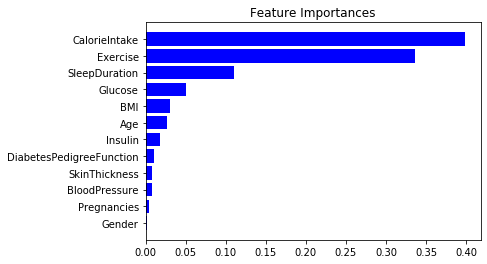


Confusion matrix: 
[[123   0]
 [  2  67]]

Evaluation scores: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       123
           1       1.00      0.97      0.99        69

    accuracy                           0.99       192
   macro avg       0.99      0.99      0.99       192
weighted avg       0.99      0.99      0.99       192



In [62]:
#Get accuracy score and feature importances of Random Forest Classifier

predictRFC = modelRFC.predict(x_ts)

print("Accuracy: " + str(accuracy_score(y_ts, predictRFC) * 100) + '%')
print("\nFeature importances: ")
print(modelRFC.feature_importances_)

feature_names = ['Pregnancies','Gender','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','CalorieIntake','Exercise','SleepDuration']
std = np.std([tree.feature_importances_ for tree in modelRFC.estimators_], axis=0)
indices = np.argsort(modelRFC.feature_importances_)
plt.figure()
plt.title("Feature Importances")
plt.barh(range(x.shape[1]), modelRFC.feature_importances_[indices],
       color="b")
plt.yticks(range(x.shape[1]), [feature_names[i] for i in indices])
plt.ylim([-1, x.shape[1]])
plt.show()

print("\nConfusion matrix: ") 
print(confusion_matrix(y_ts, predictRFC))
print("\nEvaluation scores: ")
print(classification_report(y_ts, predictRFC))

In [63]:
#Get parameters of Random Forest Classifier to do hyperparameter tuning

modelRFC.get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [16]:
#Use GridSearchCV to get best parameters

params = {"n_estimators" : [500, 600, 750, 1000],
          "max_depth" : [6, 5, 4, 3],
          "n_jobs" : [1, 2, 3]         
          }


modelCV = GridSearchCV(modelRFC,
                       params,
                       cv=10,
                       n_jobs=-1,
                       verbose=2).fit(x_tr,y_tr.values.ravel())

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.5min finished


In [17]:
#Get best parameters as a result of GridSearchCV

modelCV.best_params_

{'max_depth': 6, 'n_estimators': 500, 'n_jobs': 1}

In [22]:
#Execute Random Forest Classifier with better parameters to get higher accuracy score

modelTuned = RandomForestClassifier(max_depth=6,
                                    n_estimators=500,
                                    n_jobs=1)

modelTuned.fit(x_tr,y_tr.values.ravel())
predict_survival2 = modelTuned.predict(x_ts)
print("Accuracy: " + str(accuracy_score(y_ts, predict_survival2) * 100) + '%')

Accuracy: 99.47916666666666%
